___
# <font color= #d4b1e6> **Proyecto 1: An√°lisis de Sentimientos** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Luc√≠a Beltr√°n, Priscila Cervantes Ram√≠rez & M√≥nica Ibarra Herrera` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Miner√≠a de Textos` </font>
___

A continuaci√≥n se trabajar√° con un dataset que contiene rese√±as de pel√≠culas que est√°n etiquetadas como positivas y negativas.

En este proyecto se implementar√°n y comparar√°n modelos basados en n-grams (unigramas, bigramas y trigramas) enfocados en la clasificaci√≥n de texto. El objetivo es evaluar c√≥mo los diferentes tama√±os de n-gramas influyen en el desempe√±o de los algoritmos que se emplear√°n. 

Los modelos que se incluir√°n son los siguientes:
- Regresi√≥n Log√≠stica 
- Naive Bayes
- SVM

Para cada uno de los modelos mencionados anteriormente se obtendr√°n diferentes m√©tricas como Accuracy, Precision, Recall y F1-Score.

Se har√°n evaluaciones y se determinar√° cu√°l fue el modelo con el mejor desempe√±o, as√≠ como se revisar√°n algunos errores que hicieron los modelos para identificar por qu√© predijo mal, ya sea porque la rese√±a era de sarcasmo, negaci√≥n, etc.

### <font color= #d4b1e6> **Librer√≠as a utilizar** </font>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

### <font color= #d4b1e6> **Importaci√≥n de los datos** </font>

In [35]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

*Visualizar que no haya valores nulos*

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### <font color= #d4b1e6> **Divisi√≥n train/test** </font>

In [37]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42, stratify=df['sentiment'])

print("Tama√±o train:", len(train_df))
print("Tama√±o test:", len(test_df))


Tama√±o train: 25000
Tama√±o test: 25000


Se usar√°n el 50% es decir 25,000 rese√±as para entrenar a los modelos y las rese√±as restantes, se usar√°n para probar su rendimiento.

### <font color= #d4b1e6> **Pre-Procesamiento** </font>

In [38]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Se utiliz√≥ la librer√≠a NLTK (Natural Language Toolkit) para realizar la tokenizaci√≥n del texto. Para ello fue necesario descargar los recursos *punkt*, *punkt_tab* y *stopwords*.

- *punkt* permite dividir de manera autom√°tica un texto en oraciones y palabras (tokens). 

- *punkt_tab* contiene informaci√≥n extra para que funcione de manera correcta el tokenizador.

- *stopwords* que contiene un listado de palabras muy frecuentes en el idioma (como the, is, and) que suelen eliminarse por no aportar valor al analizar texto.

De esta forma, se asegura que cada rese√±a se transforme en una secuencia de palabras significativas antes de construir representaciones con n-gramas.

*Limpieza de rese√±as*

In [39]:
STOPWORDS = set(stopwords.words("english"))
PUNCT_TABLE = str.maketrans("", "", string.punctuation)

- *STOPWORDS* importa una lista de stopwords en ingl√©s desde NLTK y las convierte en un conjunto para que las b√∫squedas sean m√°s r√°pidas cuando se filtre texto.
- *PUNCT_TABLE* crea una tabla de traducci√≥n que sirve para eliminar todos los signos de puntuaci√≥n, limpia el texto quitando las puntuaciones.

In [40]:
def preprocess_text(text, remove_stopwords=False):
    # Min√∫sculas
    text = text.lower()
    # Eliminar HTML
    text = re.sub(r"<.*?>", " ", text)
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar tokens que no son alfanum√©ricos
    tokens = [t for t in tokens if any(c.isalnum() for c in t)]
    # Eliminar stopwords si se requiere
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOPWORDS]
    return " ".join(tokens)

# Aplicamos a train y test
train_df["clean_review"] = train_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))
test_df["clean_review"] = test_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))

train_df.head()

review sentiment  \
3055   Trio's vignettes were insightful and quite enj...  positive   
47326  I had never heard of this one before the owner...  negative   
48869  This is an excellent but hard to find trippy W...  positive   
48623  I am a huge fan of big, loud, trashy, complete...  positive   
39657  Easily Lucio Fulci's most respected film, "Don...  positive   

                                            clean_review  
3055   trio 's vignettes were insightful and quite en...  
47326  i had never heard of this one before the owner...  
48869  this is an excellent but hard to find trippy w...  
48623  i am a huge fan of big loud trashy completely ...  
39657  easily lucio fulci 's most respected film do n...

Se implementa una funci√≥n de preprocesamiento de texto que:

1) Convierte todo a min√∫sculas.

2) Elimina etiquetas HTML.

3) Tokeniza las rese√±as en palabras individuales.

4) Filtra tokens que no son letras o n√∫meros como signos de puntuaci√≥n

5) Opcionalmente elimina stopwords.

Se decidi√≥ no eliminar las stopwords durante el preprocesamiento, ya que en an√°lisis de sentimientos estas palabras pueden cambiar el significado de una oraci√≥n. Palabras como ‚Äònot‚Äô, ‚Äònever‚Äô o ‚Äòdon‚Äôt‚Äô son esenciales para que el modelo identifique correctamente si la rese√±a es positiva o negativa. 

De esta manera, se obtiene una columna clean_review con texto m√°s limpio y normalizado, que facilita el posterior an√°lisis y entrenamiento del modelo de clasificaci√≥n.

*Extracci√≥n de caracter√≠sticas*

In [41]:
# Ejemplo con unigramas
vectorizer_uni = CountVectorizer(ngram_range=(1,1), max_features=50000)
X_train_uni = vectorizer_uni.fit_transform(train_df["clean_review"])
X_test_uni = vectorizer_uni.transform(test_df["clean_review"])

y_train_uni = train_df["sentiment"]
y_test_uni = test_df["sentiment"]

# Ejemplo con bigramas
vectorizer_bi = CountVectorizer(ngram_range=(2,2), max_features=50000)
X_train_bi = vectorizer_bi.fit_transform(train_df["clean_review"])
X_test_bi = vectorizer_bi.transform(test_df["clean_review"])

y_train_bi = train_df["sentiment"]
y_test_bi = test_df["sentiment"]


# Ejemplo con trigramas
vectorizer_tri = CountVectorizer(ngram_range=(3,3), max_features=50000)
X_train_tri = vectorizer_tri.fit_transform(train_df["clean_review"])
X_test_tri = vectorizer_tri.transform(test_df["clean_review"])

y_train_tri = train_df["sentiment"]
y_test_tri = test_df["sentiment"]

Para representar las rese√±as se utiliz√≥ un CountVectorizer de Scikit-learn para extraer unigramas, bigramas y trigramas. Esto significa que cada rese√±a se transforma en un vector que refleja la frecuencia de palabras individuales y combinaciones de dos o tres palabras consecutivas. Se limit√≥ el vocabulario a 50,000 caracter√≠sticas para reducir el consumo de memoria.

El vectorizador se ajusta al conjunto de entrenamiento y luego se aplica al conjunto de prueba usando el mismo vocabulario aprendido, asegurando que la evaluaci√≥n sea consistente. Las etiquetas de sentimiento se almacenan por separado en y_train y y_test, y las dimensiones de las matrices resultantes reflejan el n√∫mero de rese√±as y la cantidad de n-gramas considerados.

### <font color= #d4b1e6> **Entrenamiento de Modelos** </font> 

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

**Unigramas**

In [42]:
logreg_uni = LogisticRegression(max_iter=1000, solver="saga")
logreg_uni.fit(X_train_uni, y_train_uni)
y_pred_logreg_uni = logreg_uni.predict(X_test_uni)

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Bigramas**

In [43]:
logreg_bi = LogisticRegression(max_iter=1000, solver="saga")
logreg_bi.fit(X_train_bi, y_train_bi)
y_pred_logreg_bi = logreg_bi.predict(X_test_bi)

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Trigramas**

In [44]:
logreg_tri = LogisticRegression(max_iter=1000, solver="saga")
logreg_tri.fit(X_train_tri, y_train_tri)
y_pred_logreg_tri = logreg_tri.predict(X_test_tri)

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*Explicaci√≥n de hiperpar√°metros*

Para entrenar el modelo de Regresi√≥n Log√≠stica se utiliz√≥ LogisticRegression de Scikit-learn con los hiperpar√°metros max_iter=1000 y solver="saga".

- *max_iter* de 1000 para asegurar que el algoritmo converja, dado el tama√±o y la alta dimensionalidad de los datos de n-grams.

- *solver="saga"* fue elegido por su eficiencia con matrices dispersas y por su capacidad de manejar regularizaci√≥n L1 y L2, caracter√≠sticas √∫tiles para textos con muchas caracter√≠sticas.

#### <font color= #96d9cf> **Naive Bayes** </font>

**Unigramas**

In [45]:
nb_uni = MultinomialNB()
nb_uni.fit(X_train_uni, y_train_uni)
y_pred_nb_uni = nb_uni.predict(X_test_uni)

**Bigramas**

In [46]:
nb_bi = MultinomialNB()
nb_bi.fit(X_train_bi, y_train_bi)
y_pred_nb_bi = nb_bi.predict(X_test_bi)

**Trigramas**

In [47]:
nb_tri = MultinomialNB()
nb_tri.fit(X_train_tri, y_train_tri)
y_pred_nb_tri = nb_tri.predict(X_test_tri)


Se entren√≥ un modelo Naive Bayes multinomial para clasificar las rese√±as en positivas o negativas. Este modelo es adecuado para datos de conteo, como los vectores de n-grams, ya que estima la probabilidad de cada palabra dado el sentimiento de la rese√±a.

#### <font color= #96d9cf> **SVM** </font>

**Unigramas**

In [48]:
svm_uni = LinearSVC(C=0.001)
svm_uni.fit(X_train_uni, y_train_uni)
y_pred_svm_uni = svm_uni.predict(X_test_uni)

**Bigramas**

In [49]:
svm_bi = LinearSVC(C=0.001)
svm_bi.fit(X_train_bi, y_train_bi)
y_pred_svm_bi = svm_bi.predict(X_test_bi)

**Trigramas**

In [50]:
svm_tri = LinearSVC(C=0.001)
svm_tri.fit(X_train_tri, y_train_tri)
y_pred_svm_tri = svm_tri.predict(X_test_tri)

Se utiliz√≥ Support Vector Machine Lineal, adecuado para matrices dispersas de alta dimensionalidad como las obtenidas con n-grams. 

*Explicaci√≥n de hiperpar√°metros*:

- C: controla la regularizaci√≥n y penalizaci√≥n de errores.


### <font color= #d4b1e6> **Evaluaci√≥n** </font> 

In [ ]:
def evaluar_modelo(nombre, y_true, y_pred):
    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1-Score": f1_score(y_true, y_pred, average="macro")
    }

In [52]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["positive", "negative"],
                yticklabels=["positive", "negative"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

In [ ]:
resultados = []

resultados.append(evaluar_modelo("LogReg Unigramas", y_test_uni, y_pred_logreg_uni))
resultados.append(evaluar_modelo("LogReg Bigramas", y_test_bi, y_pred_logreg_bi))
resultados.append(evaluar_modelo("LogReg Trigramas", y_test_tri, y_pred_logreg_tri))

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print(df_resultados)


             Modelo  Accuracy  Precision   Recall  F1-Score
0  LogReg Unigramas   0.89052   0.890559  0.89052  0.890517
1   LogReg Bigramas   0.87860   0.878620  0.87860  0.878598
2  LogReg Trigramas   0.83244   0.832613  0.83244  0.832418


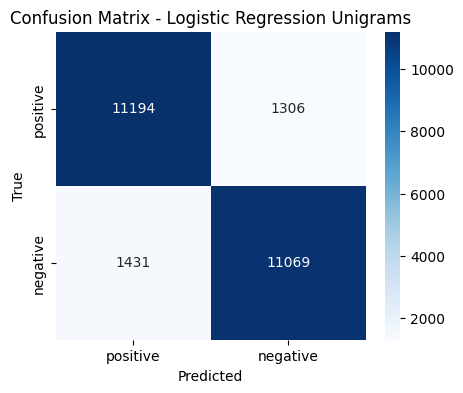

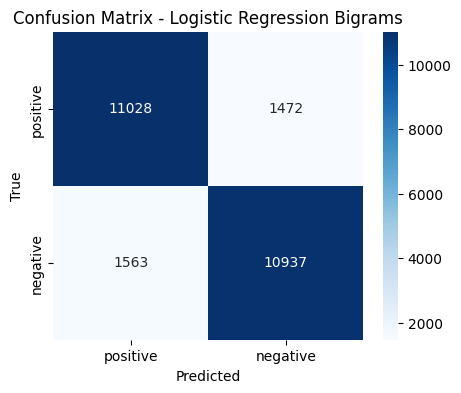

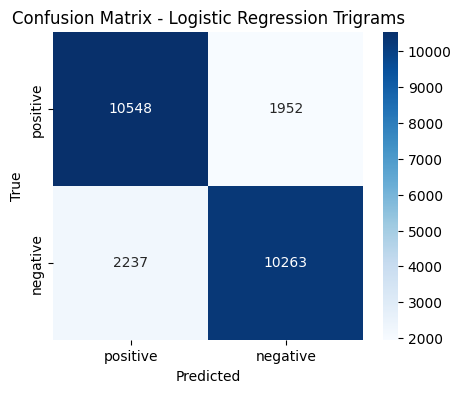

In [54]:
plot_confusion(y_test_uni, y_pred_logreg_uni, "Confusion Matrix - Logistic Regression Unigrams")
plot_confusion(y_test_bi, y_pred_logreg_bi, "Confusion Matrix - Logistic Regression Bigrams")
plot_confusion(y_test_tri, y_pred_logreg_tri, "Confusion Matrix - Logistic Regression Trigrams")

#### <font color= #96d9cf> **Naive Bayes** </font>

In [ ]:
resultados = []

resultados.append(evaluar_modelo("Naive Bayes Unigramas", y_test_uni, y_pred_nb_uni))
resultados.append(evaluar_modelo("Naive Bayes Bigramas", y_test_bi, y_pred_nb_bi))
resultados.append(evaluar_modelo("Naive Bayes Trigramas", y_test_tri, y_pred_nb_tri))

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print(df_resultados)

                  Modelo  Accuracy  Precision   Recall  F1-Score
0   Naive Bayes Bigramas   0.87484   0.874871  0.87484  0.874837
1  Naive Bayes Trigramas   0.85724   0.857512  0.85724  0.857213
2  Naive Bayes Unigramas   0.84212   0.843353  0.84212  0.841978


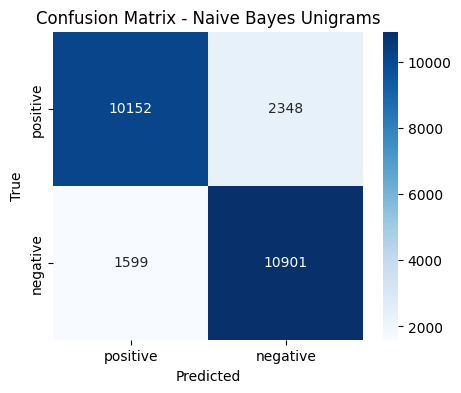

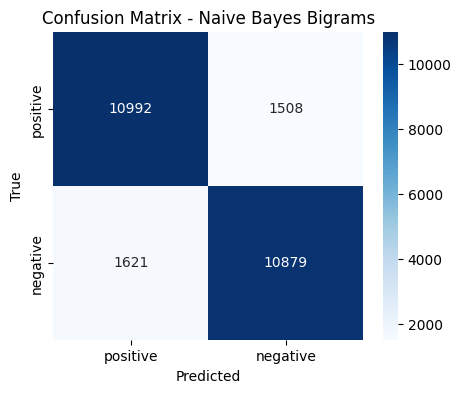

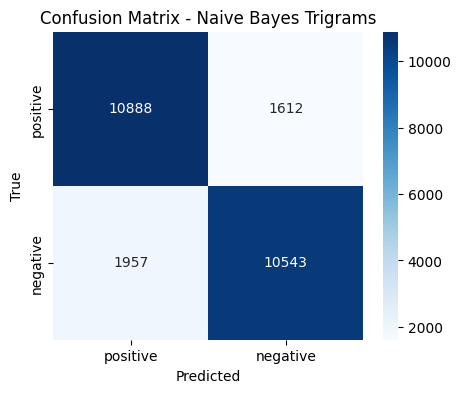

In [56]:
plot_confusion(y_test_uni, y_pred_nb_uni, "Confusion Matrix - Naive Bayes Unigrams")
plot_confusion(y_test_bi, y_pred_nb_bi, "Confusion Matrix - Naive Bayes Bigrams")
plot_confusion(y_test_tri, y_pred_nb_tri, "Confusion Matrix - Naive Bayes Trigrams")

#### <font color= #96d9cf> **SVM** </font>

In [ ]:
resultados = []

resultados.append(evaluar_modelo("SVM Unigramas", y_test_uni, y_pred_svm_uni))
resultados.append(evaluar_modelo("SVM Bigramas", y_test_bi, y_pred_svm_bi))
resultados.append(evaluar_modelo("SVM Trigramas", y_test_tri, y_pred_svm_tri))

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print(df_resultados)

          Modelo  Accuracy  Precision   Recall  F1-Score
0  SVM Unigramas   0.88628   0.886424  0.88628  0.886269
1   SVM Bigramas   0.87168   0.872073  0.87168  0.871646
2  SVM Trigramas   0.81008   0.811562  0.81008  0.809854


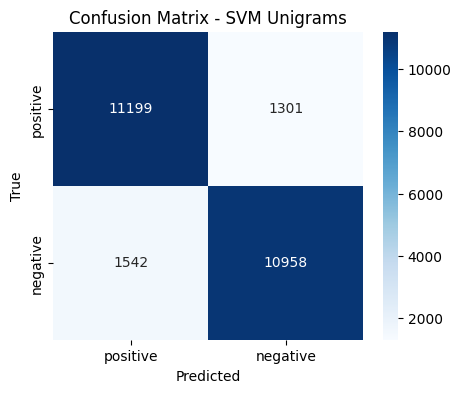

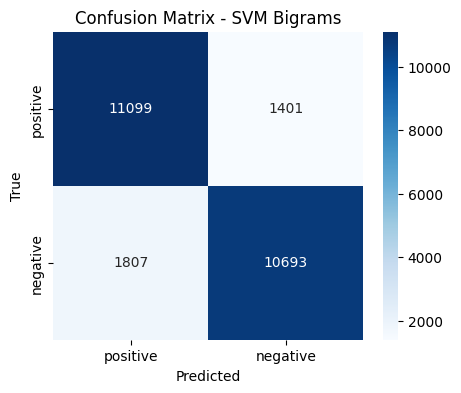

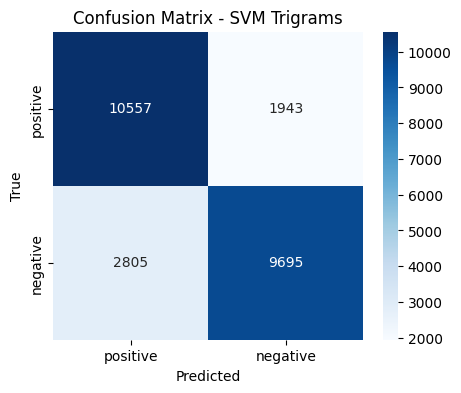

In [58]:
plot_confusion(y_test_uni, y_pred_svm_uni, "Confusion Matrix - SVM Unigrams")
plot_confusion(y_test_bi, y_pred_svm_bi, "Confusion Matrix - SVM Bigrams")
plot_confusion(y_test_tri, y_pred_svm_tri, "Confusion Matrix - SVM Trigrams")

### <font color= #d4b1e6> **Comparaci√≥n de resultados** </font> 

| Modelo | Accuracy | F1-Score | Precision | Recall |
|------------|-------|-------|------|--------|
| Regresi√≥n log√≠stica Unigramas|0.89|0.89|0.89| 0.89| 
| Regresi√≥n log√≠stica Bigramas|0.87|0.87|0.87| 0.87| 
| Regresi√≥n log√≠stica Trigramas|0.83|0.83|0.83| 0.83| 
| Naive Bayes Unigramas|0.87|0.87|0.87|0.87|   
| Naive Bayes Bigramas|0.85|0.85|0.85|0.85|
| Naive Bayes Trigramas|0.84|0.84|0.84|0.84| 
| SVM Unigramas|0.88|0.88|0.88|0.88|
| SVM Bigramas|0.87|0.87|0.87|0.87|
| SVM Trigramas|0.81|0.81|0.81|0.80|

Analizando los resultados podemos ver que el obtuvo mejor m√©tricas fue la Regresi√≥n Log√≠stica con Unigramas.

Tambi√©n podemos observar que los modelos entrenados con trigramas tuvieron un desempe√±o ligeramente inferior en comparaci√≥n con los unigramas y bigramas. Esto se debe a que los trigramas generan vectores de caracter√≠sticas mucho m√°s dispersos. Adem√°s, los trigramas son m√°s espec√≠ficos, lo que aumenta la probabilidad de sobreajuste a patrones raros del conjunto de entrenamiento que no se repiten en el conjunto de prueba. Por estas razones, aunque los trigramas capturan un contexto m√°s amplio, no siempre tienen un mejor desempe√±o, y en nuestro caso los modelos con unigramas y bigramas mostraron m√©tricas m√°s altas de precisi√≥n y F1-score.

### <font color= #d4b1e6> **An√°lisis de Error** </font> 

A continuaci√≥n se har√° un an√°lisis de error para determinar por qu√© el modelo predijo que la rese√±a era negativa cuando en realidad era positiva o viceversa.

Lo haremos con el modelo que mejor rendimiento tuvo, el cual fue Regresi√≥n Log√≠stica con unigramas.

Haremos el an√°lisis con 5 ejemplos para determinar en d√≥dnde est√° fallando el modelo y concluir si no detecta bien el sarcasmo, iron√≠a, negaci√≥n, etc.

In [60]:
# Escogemos un modelo para analizar (ej. Logistic Regression)
y_pred = y_pred_logreg_uni  

# Encuentra √≠ndices de errores
errores_idx = [i for i, (y_true, y_hat) in enumerate(zip(y_test_uni, y_pred)) if y_true != y_hat]

print("Total errores:", len(errores_idx))

# Muestra algunos ejemplos al azar usando el texto original
for i in random.sample(errores_idx, 5):
    print("="*80)
    print("üîπ Review original:")
    print(test_df.iloc[i]["review"])   # aqu√≠ usamos test_df, no X_test
    print("Sentiment real:", test_df.iloc[i]["sentiment"])
    print("Predicci√≥n modelo:", y_pred[i])

Total errores: 2737
üîπ Review original:
I'm not going to lie and say I don't watch the show--I do. BUT it has a lot, and a lot of flaws. 1) The Boarding School is perfect. The drama is at a minimum. Everyone is so nice to each other, you know. Lets give that a reality check. Its IMPOSSIBLE that ANY school is perfect like PCA. Free laptops for everyone. Big dorm rooms. Mini fridges. If there was a school like that in real life, almost nobody there would be a virgin for one. Two, everyone there is so rich, and its weird how nobody has anything stolen yet. 2) Characters really unrealistic. First things first, who in they're right minds talk like they do. They talk like a perfect teenager would. Secondly, Logan Reese(Matthew Underwood) is an extremely rich boy "hot" teenage boy. My question is, why isn't almost ever girl in that school all over him? He's rich and "hot" now a days all those girls would be after him, even if he was a jerk. Also, Chase is the most stupidest person ever. He 

- En el primer ejemplo, el modelo predijo que era una rese√±a positiva cuando en realidad era negativa. En la rese√±a aparecen palabras como perfect, nice, free, big y hot, que normalmente se asocian a un sentimiento positivo. Sin embargo, muchas de estas palabras se usan de manera sarc√°stica o ir√≥nica, por ejemplo: ‚ÄúThe Boarding School is perfect‚Äù y ‚ÄúEveryone is so nice to each other‚Äù son cr√≠ticas disfrazadas de elogios.

- En el segundo ejemplo, el modelo predijo que era una rese√±a negativa cuando era positiva. En la rese√±a aparecen palabras como difficult situation, low scores, sorry, por lo que el modelo predijo negativo porque se bas√≥ en estas palabras con connotaci√≥n negativa y no pudo interpretar que la rese√±a era positiva de manera un poco indirecta.

- En el tercer ejemplo donde predijo que era positiva cuando era negativa, se debe a que se centr√≥ en palabras positivas asociadas a otros episodios, sin interpretar el contexto ni la iron√≠a.

- En el cuarato ejemplo donde era negativa pero el modelo predijo negativo, es porque se bas√≥ en palabras aisladas con connotaci√≥n positiva o neutra que aparecen a lo largo de la explicaci√≥n, sin entender el contexto ni la cr√≠tica central. Este error muestra que los modelos de Unigramas no pueden manejar rese√±as largas con explicaciones dif√≠ciles, negaciones o sarcasmo impl√≠cito, y tienden a ser enga√±ados por palabras positivas.

- En el √∫ltimo ejemplo, predijo que era negativo cuando en realidad es positivo, porque se bas√≥ en palabras con connotaci√≥n negativa presentes en la descripci√≥n de la trama, sin interpretar que el sentimiento era positivo. Este caso muestra otra limitaci√≥n de los modelos de n-gramas los cuales confunden violencia, miedo o palabras dram√°ticas de la historia con cr√≠ticas negativas.

### <font color= #d4b1e6> **Conclusiones** </font> 

Aunque el modelo que mejor desempe√±o tuvo fue el de Rgeresi√≥n Log√≠stica con n-gramas, analizando los errores nos pudimos dar cuenta de las limitaciones que tiene, como por ejemplo cuando hay negaci√≥n, iron√≠a, sarcasmo, violencia.

Los errores en la predicci√≥n se daban gracias a que le daba peso a las palabras negativas dentro de rese√±as positivas, aunque solo se usen para describir escenas, personajes o incluso a la misma aplicaci√≥n. Otro error, que va de la mano con el anterior, es que se deja guiar por las primeras palabras que hay en la rese√±a, por esto si una rese√±a empieza diciendo lo bueno para acabar diciendo que es la peor pel√≠cula, el modelo no lo terminar√° de entender. 

Tambi√©n nos percatamos que cuando en una rese√±a existe iron√≠a no logra comprenderla, asi como no distingue sentimientos hacia la pel√≠cula con los elementos externos. En pocas palabras, el modelo analizaba superficialmente el texto en vez de comprender la intenci√≥n completa del autor.